### Name : Aya AbdelMoniem Mohamed 
### id : 20221462478
### dep : AI 

# <center> Cat Dog  Sound Classification 🐱🐶 </center>

<a id="ToC"></a>
# Table of Contents

- [1. Introduction](#introduction)

- [2. Imports](#2)

- [3. Data Loading ](#3)

- [4. Data Pre-Processing](#4)  

- [5. Data Visualization](#5) 

- [6. Data Augumentaion](#6) 

- [7. Feature Extraction](#7)  

- [8. Plotting](#8)  

- [9. Modeling](#9)

- [10. Evaluation](#10)

<a id="introduction"></a>
# **<div style="padding:10px;color:white;display:fill;border-radius:5px;background-color:#5642C5;font-size:120%;font-family:Verdana;"><center><span> Introduction </span></center></div>**

This notebook is focused on the analysis and processing of a dataset containing audio files of cat and dog sounds. The dataset is split into training and test sets for each category. The primary goal is to measure the accuracy of the developed model..

## Dataset Overview
The dataset consists of 115 entries, with the following structure:

test_cat: Filenames of cat sound files used in the test set (49 entries).

test_dog: Filenames of dog sound files used in the test set (49 entries).

train_cat: Filenames of cat sound files used in the training set (115 entries).

train_dog: Filenames of dog sound files used in the training set (64 entries).

The data is split in such a way that there are varying numbers of files in the training and test sets for each category. 


<a id="2"></a>
# **<div style="padding:10px;color:white;display:fill;border-radius:5px;background-color:#5642C5;font-size:120%;font-family:Verdana;"><center><span> Imports </span></center></div>**

In [1]:
import os
import numpy as np
import pandas as pd
import librosa
import matplotlib.pyplot as plt

from glob import glob
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder,MinMaxScaler
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.dummy import DummyClassifier

<a id="3"></a>
# **<div style="padding:10px;color:white;display:fill;border-radius:5px;background-color:#5642C5;font-size:120%;font-family:Verdana;"><center><span> Data Loading</span></center></div>**

<a id="3.2"></a>
## <span style="color:#ffffff;"> Loading data </span>

In [2]:
df=pd.read_csv("C:/Users/REWAN/Downloads/Cat_Dog_Data/train_test_split.csv",index_col=0)
df

,test_cat,test_dog,train_cat,train_dog
0,cat_22.wav,dog_barking_97.wav,cat_99.wav,dog_barking_33.wav
1,cat_116.wav,dog_barking_0.wav,cat_54.wav,dog_barking_86.wav
2,cat_155.wav,dog_barking_93.wav,cat_34.wav,dog_barking_45.wav
3,cat_58.wav,dog_barking_10.wav,cat_132.wav,dog_barking_76.wav
4,cat_77.wav,dog_barking_26.wav,cat_124.wav,dog_barking_4.wav
...,...,...,...,...
110,NaN,NaN,cat_15.wav,NaN
111,NaN,NaN,cat_88.wav,NaN
112,NaN,NaN,cat_73.wav,NaN
113,NaN,NaN,cat_32.wav,NaN


<a id="4"></a>
# **<div style="padding:10px;color:white;display:fill;border-radius:5px;background-color:#5642C5;font-size:120%;font-family:Verdana;"><center><span> Data Pre-Processing </span></center></div>**

In [3]:
test_data = pd.concat([df['test_cat'].dropna(), df['test_dog'].dropna()], axis=0).reset_index(drop=True)
# Create the label column: 0 for 'test_cat' entries, 1 for 'test_dog' entries
test_labels = [0] * len(df['test_cat'].dropna()) + [1] * len(df['test_dog'].dropna())


train_data = pd.concat([df['train_cat'].dropna(), df['train_dog'].dropna()], axis=0).reset_index(drop=True)
# Create the label column: 0 for 'test_cat' entries, 1 for 'test_dog' entries
train_labels = [0] * len(df['train_cat'].dropna()) + [1] * len(df['train_dog'].dropna())

testData = pd.DataFrame({'audio': test_data, 'label': test_labels})

trainData = pd.DataFrame({'audio': train_data, 'label': train_labels})

directory_path= "cats_dogs/"

trainData['audio'] = trainData.apply(
    lambda row: directory_path + row['audio'] if row['label'] == 0 else directory_path + row['audio'],
    axis=1
)

testData['audio'] = testData.apply(
    lambda row: directory_path+ row['audio'] if row['label'] == 0 else directory_path + row['audio'],
    axis=1
)
    

# Add the label column to train and test data
print("Test Data")
print(testData)

print("Train Data")
print(trainData)

Test Data
                            audio  label
0            cats_dogs/cat_22.wav      0
1           cats_dogs/cat_116.wav      0
2           cats_dogs/cat_155.wav      0
3            cats_dogs/cat_58.wav      0
4            cats_dogs/cat_77.wav      0
..                            ...    ...
93  cats_dogs/dog_barking_109.wav      1
94   cats_dogs/dog_barking_69.wav      1
95   cats_dogs/dog_barking_77.wav      1
96   cats_dogs/dog_barking_60.wav      1
97   cats_dogs/dog_barking_57.wav      1

[98 rows x 2 columns]
Train Data
                             audio  label
0             cats_dogs/cat_99.wav      0
1             cats_dogs/cat_54.wav      0
2             cats_dogs/cat_34.wav      0
3            cats_dogs/cat_132.wav      0
4            cats_dogs/cat_124.wav      0
..                             ...    ...
174    cats_dogs/dog_barking_9.wav      1
175  cats_dogs/dog_barking_111.wav      1
176   cats_dogs/dog_barking_67.wav      1
177  cats_dogs/dog_barking_108.wav      1
17

In [4]:
# Shuffle the Data
testData = testData.sample(frac=1).reset_index(drop=True)
trainData = trainData.sample(frac=1).reset_index(drop=True)
print("Test Data after Shuffle")
print(testData)

print("Train Data after Shuffle")
print(trainData)

Test Data after Shuffle
                            audio  label
0            cats_dogs/cat_12.wav      0
1            cats_dogs/cat_58.wav      0
2    cats_dogs/dog_barking_78.wav      1
3   cats_dogs/dog_barking_112.wav      1
4            cats_dogs/cat_83.wav      0
..                            ...    ...
93   cats_dogs/dog_barking_82.wav      1
94           cats_dogs/cat_21.wav      0
95          cats_dogs/cat_116.wav      0
96           cats_dogs/cat_77.wav      0
97           cats_dogs/cat_46.wav      0

[98 rows x 2 columns]
Train Data after Shuffle
                             audio  label
0      cats_dogs/dog_barking_9.wav      1
1     cats_dogs/dog_barking_79.wav      1
2            cats_dogs/cat_147.wav      0
3            cats_dogs/cat_146.wav      0
4    cats_dogs/dog_barking_108.wav      1
..                             ...    ...
174   cats_dogs/dog_barking_88.wav      1
175           cats_dogs/cat_78.wav      0
176          cats_dogs/cat_105.wav      0
177  cats_dogs/d

In [5]:
test_data, test_labels = testData['audio'].values, testData['label'].values
train_data, train_labels = trainData['audio'].values, trainData['label'].values

<a id="5"></a>
# **<div style="padding:10px;color:white;display:fill;border-radius:5px;background-color:#5642C5;font-size:120%;font-family:Verdana;"><center><span> Data Visualization</span></center></div>**

C:\Users\REWAN\AppData\Local\Temp\ipykernel_11372\3151006030.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_xticklabels(labels)


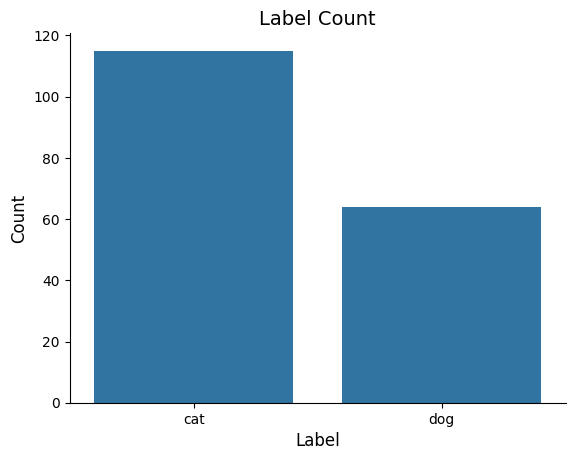

In [6]:
plt.title('Label Count', size = 14)
filtered_final_df = trainData[trainData['label']!='Unknown']

sns.countplot(data = filtered_final_df , x = 'label')
plt.xlabel('Label',size = 12)
plt.ylabel('Count' , size = 12)

# enhancing visualisation
sns.despine(top = True , right = True , bottom = False , left = False)
label_mapping = {0: 'cat', 1: 'dog'}
labels = [label_mapping[i] for i in range(len(filtered_final_df['label'].unique()))]
plt.gca().set_xticklabels(labels)

plt.show()

In [7]:
def waveplot_creation(data , sr , emotion):
    plt.figure(figsize = (10,4))
    plt.title(f"{emotion} Waveplot")

    librosa.display.waveshow(data , sr = sr)


In [8]:

def spectrogram_creation(data , sr , emotion):
    plt.figure(figsize=(12,3))
    plt.title(f"{emotion} Spectogram")


    S = librosa.stft(data) # short-time fourier transform
    Sdb = librosa.amplitude_to_db(S)

    librosa.display.specshow(Sdb , sr = sr ,  x_axis ='time' , y_axis = 'hz' )
    plt.colorbar()
    plt.tight_layout()


In [9]:
def melspectrogram_creation(data , sr , emotion):
    plt.figure(figsize=(12,3))
    plt.title(f"{emotion} Mel Spectrogram")

    MS = librosa.feature.melspectrogram(y = data , sr=sr)
    MSdb = librosa.power_to_db(MS)

    librosa.display.specshow(MSdb , sr = sr , x_axis ='time' , y_axis = 'mel' , cmap = 'viridis')
    plt.colorbar()
    plt.tight_layout()
n_fft = 2048
hop_size = 512
def MFCC_creation(data,sr):
    plt.figure(figsize=(12,3))
    MFCCs = librosa.feature.mfcc(y=data, sr=sr, n_fft=n_fft, hop_length=hop_size, n_mfcc=13)
    librosa.display.specshow(MFCCs, sr=sr, hop_length=hop_size)
    plt.xlabel("Time")
    plt.ylabel("MFCC coefficients")
    plt.colorbar()
    plt.title("MFCCs")

# Audio Visualizations

C:\Users\REWAN\AppData\Local\Temp\ipykernel_11372\1995609360.py:7: UserWarning: amplitude_to_db was called on complex input so phase information will be discarded. To suppress this warning, call amplitude_to_db(np.abs(S)) instead.
  Sdb = librosa.amplitude_to_db(S)


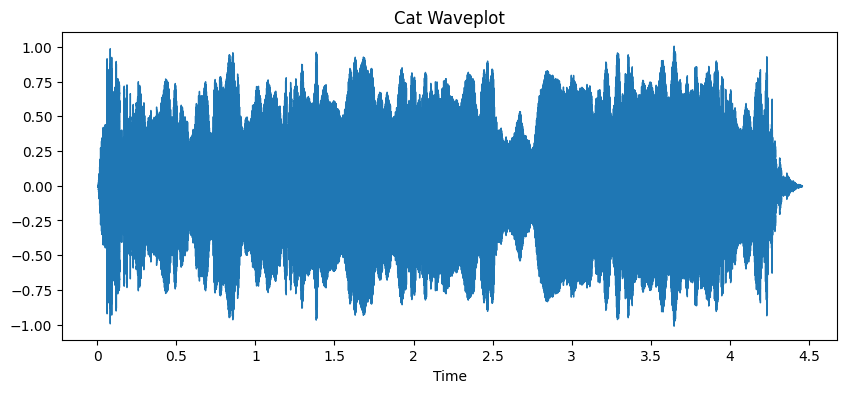

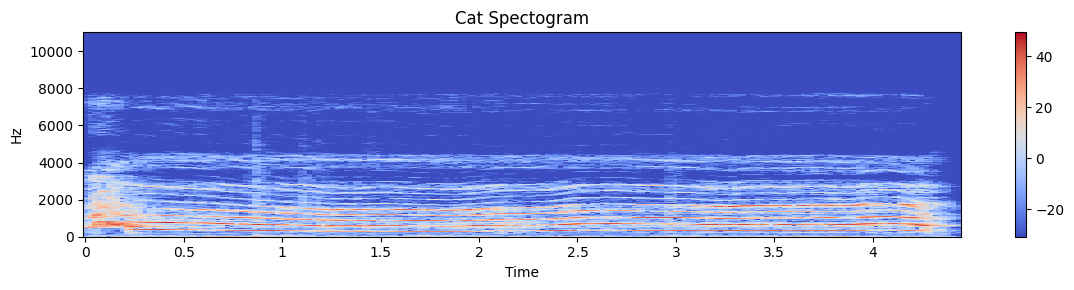

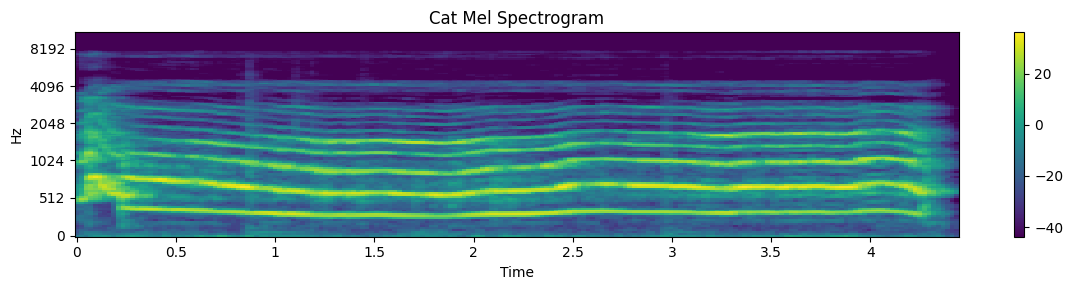

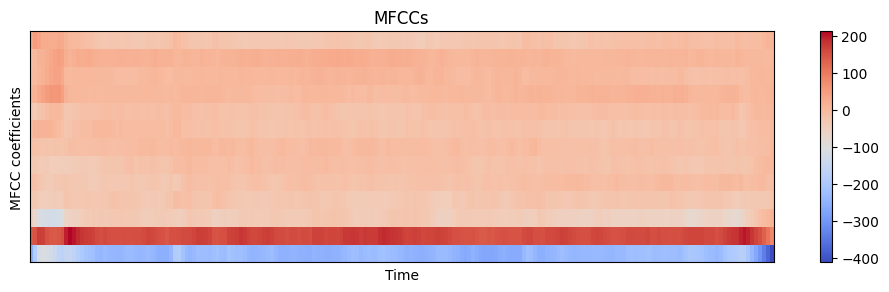

In [10]:
# to play the audio files
from IPython.display import Audio


path = np.array(trainData.audio)[1]
data , sampling_rate = librosa.load(path)

#invocation
waveplot_creation(data , sampling_rate , "Cat")
spectrogram_creation(data , sampling_rate , "Cat")
melspectrogram_creation(data , sampling_rate , "Cat")
MFCC_creation(data , sampling_rate)



Audio(path)

<a id="6"></a>
# **<div style="padding:10px;color:white;display:fill;border-radius:5px;background-color:#5642C5;font-size:120%;font-family:Verdana;"><center><span>Data Augmentation</span></center></div>**

In [11]:
# noise injection
def noise(data):
    noise_ampl = 0.035 * np.random.uniform() * np.amax(data)
    # injecting gaussian noise to the data 
    data = data + noise_ampl * np.random.normal(size = data.shape[0])
    # data.shape - a tuple that tells us about the dimension the data - [0]th has the number of elements.
    # it is important to ensure that the size of the noise array is the same as the audio data to maintain synchronization
    return data # the noise injected data

# time stretching 
def stretch(data, rate=0.8):
    # Stretch or compress the audio data by the specified rate
    stretched_data = librosa.effects.time_stretch(data, rate)
    return stretched_data
    
# time shifting
def time_shift(data):
    shift_range = int(np.random.uniform(low=-5,high=5)*1000) # converting to millisec - audio processing unit
    return np.roll(data,shift_range)


def pitch(data , sr , n_steps = 0.7):
    # 70% lower pitch
    return librosa.effects.pitch_shift(data,sampling_rate,n_steps)

path = np.array(trainData.audio)[1]
data , sampling_rate = librosa.load(path)# Data Augmentation

<a id="7"></a>
# **<div style="padding:10px;color:white;display:fill;border-radius:5px;background-color:#5642C5;font-size:120%;font-family:Verdana;"><center><span>Feature Extraction</span></center></div>**

In [12]:
def extract_features(data):
    result = np.array([])

    mfcc = np.mean(librosa.feature.mfcc(y=data, sr=16000).T, axis=0)
    result = np.hstack((result, mfcc))

    # mel = np.mean(librosa.feature.melspectrogram(y=data, sr=16000).T, axis=0)
    # result = np.hstack((result, mel))
    
    return result

def get_features(path):
    data, sample_rate = librosa.load(path, duration=2.5, offset=0.6)
    # data, sample_rate = librosa.load(path, duration=2, offset=0.6, sr=16000)
    
    res1 = extract_features(data)
    result = np.array(res1)
    
    noise_data = noise(data)
    res2 = extract_features(noise_data)
    result = np.vstack((result, res2))
    
    # stretched_data = librosa.effects.time_stretch(data , rate = 0.8)
    # res3 = extract_features(stretched_data)
    # result = np.vstack((result, res3))

    stretched_pitch_data = librosa.effects.pitch_shift(y=data ,sr=sampling_rate ,  n_steps = 0.7)
    r4 = extract_features(stretched_pitch_data)
    result = np.vstack((result,r4))
    
    return result

In [13]:
trainData.audio.shape[0]

179

In [14]:
X, Y = [], []
print("Feature processing...")
for path, emotion, ind in zip(trainData.audio,trainData.label, range(trainData.audio.shape[0])):
    features = get_features(path)
    for ele in features:
        X.append(ele)
        Y.append(emotion)
print(f"{trainData.audio.shape[0]} samples has been processed...")
print("Done.")

Feature processing...
179 samples has been processed...
Done.


In [15]:
len(X), len(Y) , trainData.audio.shape

(537, 537, (179,))

In [16]:
Features = pd.DataFrame(X)
Features['labels'] = Y
Features.to_csv('features.csv' ,index=False)
Features.head()

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,labels
0,-284.472107,134.033264,-25.933456,-2.807238,-25.053583,0.691215,-10.729411,6.909396,12.437597,14.069504,...,5.982790,18.738909,1.018655,2.518103,-2.866407,1.598980,-4.356193,-4.777317,-5.010733,1
1,-101.790703,32.971237,-1.976830,-12.655662,-10.707970,-8.911988,-4.961417,1.280114,6.303054,5.088374,...,4.306871,7.349586,3.054870,-1.258903,-1.973704,-1.309781,-2.832665,-3.072736,-1.963271,1
2,-301.548248,134.013504,-30.875982,-5.770744,-27.002447,-0.370488,-13.345675,10.480167,11.337146,15.026152,...,12.121563,15.753186,-1.800363,2.431728,-3.355663,2.260745,-8.836909,-5.182477,-5.301544,1
3,-240.968872,166.298264,-12.640965,-18.806730,-19.251583,-16.765026,-2.632155,-5.983685,-16.475203,-12.800521,...,19.184175,19.689119,-29.791641,-2.839624,5.560483,-13.237551,-0.957618,12.180019,-12.360545,1
4,-72.333727,46.527529,12.246246,-11.205347,-14.473057,-8.868518,-3.880415,-4.908493,-10.358486,-12.835820,...,3.445207,2.577902,-5.232011,-6.688582,-4.452798,-2.449211,-0.869146,-1.208614,-6.795780,1


In [17]:
X = Features.iloc[: ,:-1].values 
Y = Features['labels'].values

In [18]:
X_test, Y_test = [], []
print("Feature processing...")
for path, emotion, ind in zip(testData.audio,testData.label, range(testData.audio.shape[0])):
    features = get_features(path)
    for ele in features:
        X_test.append(ele)
        Y_test.append(emotion)
print(f"{testData.audio.shape[0]} samples has been processed...")
print("Done.")

Feature processing...
98 samples has been processed...
Done.


In [19]:
Features_test = pd.DataFrame(X_test)
Features_test['labels'] = Y_test
Features_test.to_csv('features_test.csv' ,index=False)
Features_test.head()

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,labels
0,-417.763885,180.124023,-36.322197,58.074043,-11.146145,36.127701,-18.447531,17.046926,-4.790857,-15.402015,...,-12.979343,4.411696,-16.553272,4.436230,-13.161651,-6.414972,-8.019280,-5.987112,-1.116227,0
1,-380.379708,130.066648,7.488292,21.318093,18.641596,12.906247,-1.687407,6.946460,-1.167084,-13.714787,...,-5.304017,-4.282376,-7.833817,-3.334389,-7.209228,-10.029649,-6.787060,-4.868770,-4.249108,0
2,-443.605316,170.851334,-29.848656,53.666359,-5.300928,34.455940,-18.096886,18.861809,-13.170371,-11.295427,...,-9.096601,0.081667,-13.225932,4.322593,-16.023678,-3.277465,-10.925549,-1.884692,-7.107419,0
3,-251.133606,120.993935,-60.681767,32.056416,-35.605728,32.680744,-20.207619,14.327281,-12.822100,-0.821815,...,-19.905504,0.380460,-13.678321,11.361315,-2.025670,6.484497,-11.729444,-4.639761,-2.492435,0
4,-244.699867,112.121304,-52.359517,24.536160,-29.116881,27.357528,-16.157967,11.584584,-11.314290,-1.245285,...,-18.668290,-1.350270,-11.766499,9.458099,-0.337283,5.137023,-10.833381,-5.037428,-2.576330,0


In [20]:
X_test = Features_test.iloc[: ,:-1].values 
Y_test = Features_test['labels'].values

In [21]:
X_test.shape,Y_test.shape

((294, 20), (294,))

In [22]:
# scaler = StandardScaler()
# x_train = scaler.fit_transform(X)
# x_test = scaler.fit_transform(X_test)


In [23]:
x_train = np.expand_dims(X , axis = 2)
x_test = np.expand_dims(X_test , axis = 2)


In [24]:
encoder = OneHotEncoder()
Y = encoder.fit_transform(np.array(Y).reshape(-1,1)).toarray()

Y_test = encoder.fit_transform(np.array(Y_test).reshape(-1,1)).toarray()


In [25]:
x_train.shape , Y.shape , x_test.shape , Y_test.shape

((537, 20, 1), (537, 2), (294, 20, 1), (294, 2))

<a id="8"></a>
# **<div style="padding:10px;color:white;display:fill;border-radius:5px;background-color:#5642C5;font-size:120%;font-family:Verdana;"><center><span>Plotting</span></center></div>**

In [26]:
def plotting(history):
    fig , ax = plt.subplots(1,2)
    train_acc = history.history['accuracy']
    train_loss = history.history['loss']
    test_acc = history.history['val_accuracy']
    test_loss = history.history['val_loss']

    fig.set_size_inches(20,6)
    ax[0].plot(history.epoch, train_loss , label = 'Training Loss')
    ax[0].plot(history.epoch, test_loss , label='Testing Loss')
    ax[0].set_title('Training and Testing loss')
    ax[0].legend()
    ax[0].set_xlabel('EPOCHS')

    ax[1].plot(history.epoch, train_acc , label='Training Accuracy')
    ax[1].plot(history.epoch , test_acc , label ='Testing Accuracy')
    ax[1].legend()
    ax[1].set_xlabel('EPOCHS')
    plt.show()

<a id="9"></a>
# **<div style="padding:10px;color:white;display:fill;border-radius:5px;background-color:#5642C5;font-size:120%;font-family:Verdana;"><center><span> Modeling </span></center></div>**

# Model one :

In [27]:
import keras
from keras.models import Sequential
from keras.callbacks import EarlyStopping
from keras.optimizers import SGD
from keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, Dropout, BatchNormalization

model = Sequential()
model.add(Conv1D(32 , kernel_size = 5 , strides = 1 , padding = 'same' , activation ='relu',
         input_shape=(x_train.shape[1],1)
         ))
model.add(MaxPooling1D(pool_size = 5 , strides = 2 , padding = 'same')) 
model.add(BatchNormalization())
# model.add(Dense(128 , activation = 'relu'))
# model.add(Dropout(0.5)) 
# model.add(BatchNormalization())
model.add(Flatten())
# model.add(Dense(32 , activation = 'relu'))
# model.add(Dropout(0.5)) 
model.add(BatchNormalization())

model.add(Dense(2 , activation = 'softmax'))
optimizer = SGD(learning_rate=0.01, momentum=0.9)

model.compile(optimizer = 'adam' , loss = 'categorical_crossentropy' ,metrics = ['accuracy'])
early_stopping = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)

model.summary()

c:\Users\REWAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                 │ (None, 20, 32)         │           192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ (None, 10, 32)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 10, 32)         │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 320)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 320)            │         1,280 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 2)              │           642 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,242 (8.76 KB)

 Trainable params: 1,538 (6.01 KB)

 Non-trainable params: 704 (2.75 KB)

In [28]:
history_1 = model.fit(x_train , Y , batch_size = 64 , epochs = 50 , validation_data =(x_test,Y_test),callbacks=[early_stopping])


Epoch 1/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.4897 - loss: 1.0608 - val_accuracy: 0.6633 - val_loss: 0.7176
Epoch 2/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7841 - loss: 0.5146 - val_accuracy: 0.6259 - val_loss: 0.8531
Epoch 3/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8363 - loss: 0.4319 - val_accuracy: 0.7891 - val_loss: 0.4238
Epoch 4/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8647 - loss: 0.3776 - val_accuracy: 0.8333 - val_loss: 0.3726
Epoch 5/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8714 - loss: 0.3632 - val_accuracy: 0.8129 - val_loss: 0.3825
Epoch 6/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8842 - loss: 0.3145 - val_accuracy: 0.8605 - val_loss: 0.3556
Epoch 7/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9008 - loss: 0.3017 - val_accuracy: 0.8673 - val_loss: 0.3385
Epoch 8/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8910 - loss: 0.3039 - val_accuracy: 0.8741 - val_loss: 0.3345
Epoch 

In [29]:
print("Accuracy of the model on the test data : " , model.evaluate(x_test,Y_test)[1]*100,'%')

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8521 - loss: 0.3409 
Accuracy of the model on the test data :  87.41496801376343 %


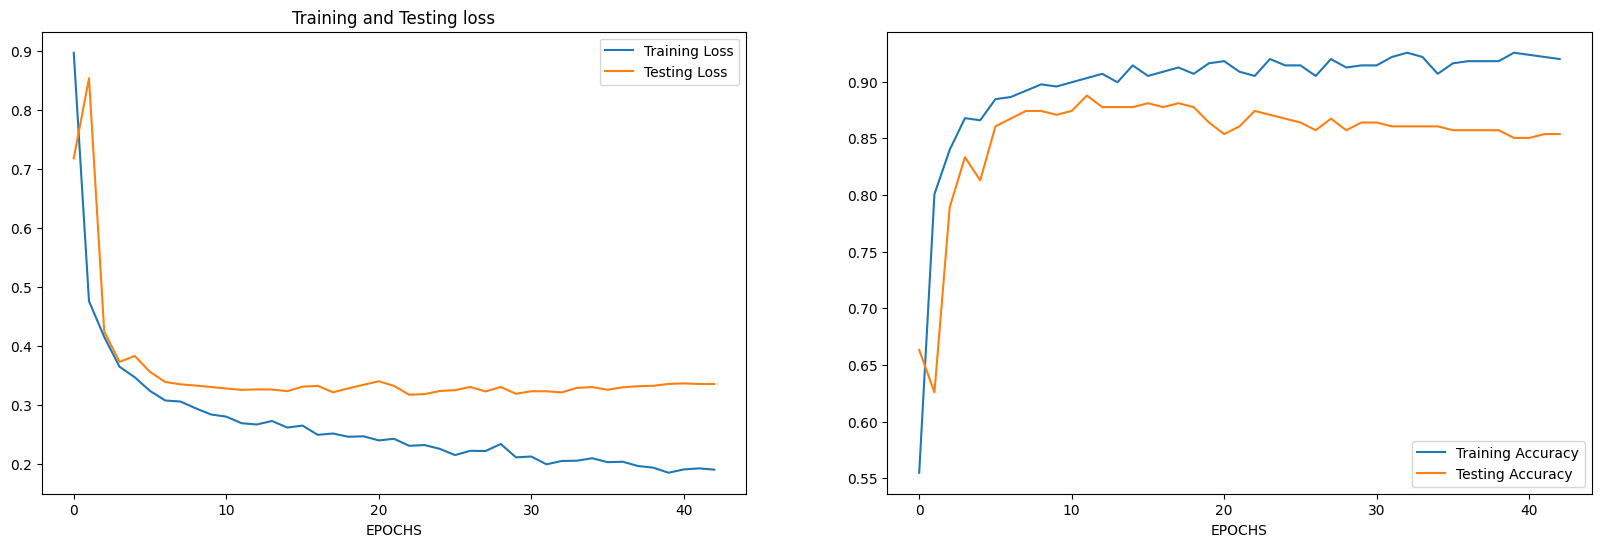

In [30]:
plotting(history_1)

## Model two :

In [31]:
import keras
from keras.models import Sequential
from keras.callbacks import EarlyStopping
from keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, Dropout, BatchNormalization

model_2 = Sequential()
model_2.add(Conv1D(32 , kernel_size = 5 , strides = 1 , padding = 'same' , activation ='relu',
         input_shape=(x_train.shape[1],1)
         ))
model_2.add(MaxPooling1D(pool_size = 5 , strides = 2 , padding = 'same')) 
model_2.add(BatchNormalization())
# model.add(Dense(128 , activation = 'relu'))
# model.add(Dropout(0.5)) 
# model.add(BatchNormalization())
model_2.add(Flatten())
model_2.add(Dense(32 , activation = 'relu'))
model_2.add(Dropout(0.5)) 

model_2.add(Dense(2 , activation = 'softmax'))
model_2.compile(optimizer = 'adam' , loss = 'categorical_crossentropy' ,metrics = ['accuracy'])
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

model_2.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_1 (Conv1D)               │ (None, 20, 32)         │           192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_1 (MaxPooling1D)  │ (None, 10, 32)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 10, 32)         │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 320)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │        10,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 2)              │            66 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,658 (41.63 KB)

 Trainable params: 10,594 (41.38 KB)

 Non-trainable params: 64 (256.00 B)

In [32]:
history_2 = model_2.fit(x_train , Y , batch_size = 64 , epochs = 50 , validation_data =(x_test,Y_test),callbacks=[early_stopping])

Epoch 1/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.5324 - loss: 0.8247 - val_accuracy: 0.7415 - val_loss: 0.6749
Epoch 2/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7297 - loss: 0.5211 - val_accuracy: 0.7483 - val_loss: 0.6227
Epoch 3/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8057 - loss: 0.4355 - val_accuracy: 0.7653 - val_loss: 0.5163
Epoch 4/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8263 - loss: 0.4220 - val_accuracy: 0.7789 - val_loss: 0.4793
Epoch 5/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8460 - loss: 0.3997 - val_accuracy: 0.8231 - val_loss: 0.4276
Epoch 6/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8718 - loss: 0.3669 - val_accuracy: 0.8265 - val_loss: 0.3902
Epoch 7/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8497 - loss: 0.3933 - val_accuracy: 0.8503 - val_loss: 0.3646
Epoch 8/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8541 - loss: 0.3652 - val_accuracy: 0.8367 - val_loss: 0.3596
Epoch 9

In [33]:
print("Accuracy of the model on the test data : " , model_2.evaluate(x_test,Y_test)[1]*100,'%')

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8730 - loss: 0.3270 
Accuracy of the model on the test data :  89.79591727256775 %


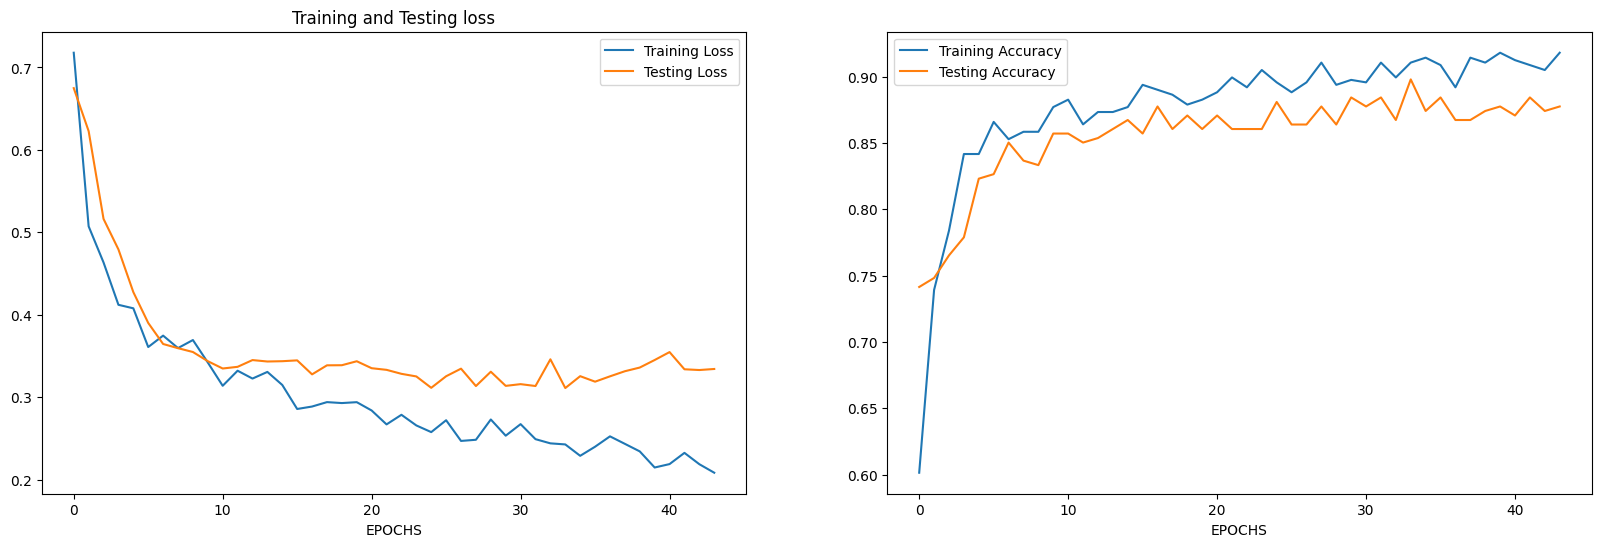

In [34]:
plotting(history_2)

## Model three :

In [35]:
import keras
from keras.models import Sequential
from keras.callbacks import EarlyStopping
from keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, Dropout, BatchNormalization

model_3 = Sequential()
model_3.add(Conv1D(256 , kernel_size = 5 , strides = 1 , padding = 'same' , activation ='relu',
         input_shape=(x_train.shape[1],1)
         ))
model_3.add(BatchNormalization())
model_3.add(MaxPooling1D(pool_size = 5 , strides = 2 , padding = 'same')) 
model_3.add(Dense(128 , activation = 'relu'))
model_3.add(Dropout(0.5)) 
model_3.add(BatchNormalization())
model_3.add(Flatten())
model_3.add(Dense(32 , activation = 'relu'))
# model.add(Dropout(0.5)) 
model_3.add(Dense(2 , activation = 'softmax'))

optimizer = SGD(learning_rate=0.01, momentum=0.9)

model_3.compile(optimizer=optimizer , loss = 'categorical_crossentropy' ,metrics = ['accuracy'])
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)



model_3.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_2 (Conv1D)               │ (None, 20, 256)        │         1,536 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 20, 256)        │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_2 (MaxPooling1D)  │ (None, 10, 256)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10, 128)        │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 10, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 10, 128)        │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 1280)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 32)             │        40,992 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 2)              │            66 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 77,026 (300.88 KB)

 Trainable params: 76,258 (297.88 KB)

 Non-trainable params: 768 (3.00 KB)

In [36]:
history_3 = model_3.fit(x_train , Y , batch_size = 64 , epochs = 50 , validation_data =(x_test,Y_test))

Epoch 1/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 4s 217ms/step - accuracy: 0.7516 - loss: 0.6133 - val_accuracy: 0.8197 - val_loss: 0.4726
Epoch 2/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8334 - loss: 0.4211 - val_accuracy: 0.7959 - val_loss: 0.8125
Epoch 3/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.8728 - loss: 0.3521 - val_accuracy: 0.8537 - val_loss: 0.3268
Epoch 4/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8650 - loss: 0.3182 - val_accuracy: 0.8639 - val_loss: 0.3108
Epoch 5/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.8930 - loss: 0.3050 - val_accuracy: 0.6122 - val_loss: 0.9340
Epoch 6/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8709 - loss: 0.2945 - val_accuracy: 0.7075 - val_loss: 0.5748
Epoch 7/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8690 - loss: 0.3014 - val_accuracy: 0.8061 - val_loss: 0.3766
Epoch 8/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8971 - loss: 0.2527 - val_accuracy: 0.8537 - val_loss: 0.3106


In [37]:
print("Accuracy of the model on the test data : " , model_3.evaluate(x_test,Y_test)[1]*100,'%')

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8598 - loss: 0.4720 
Accuracy of the model on the test data :  86.73469424247742 %


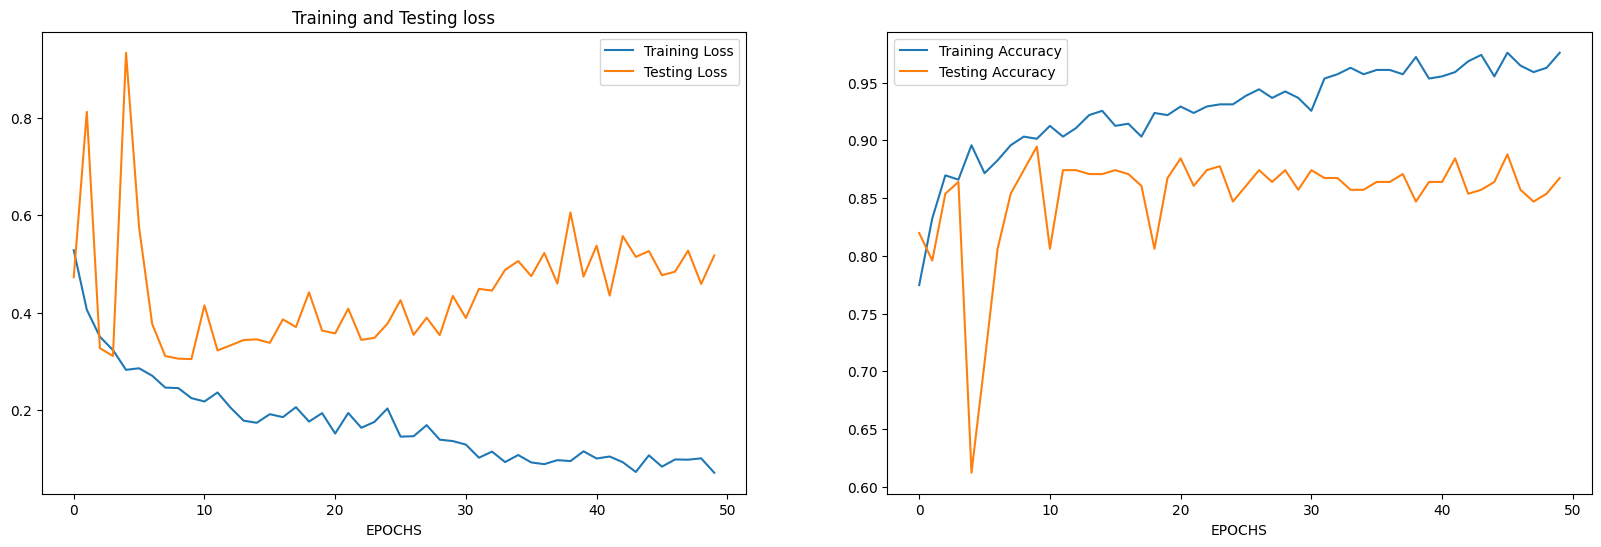

In [38]:
plotting(history_3)

## Model four :

In [39]:
from keras.models import Sequential
from keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, Dropout, BatchNormalization
from keras.regularizers import l2
from keras.callbacks import EarlyStopping

model_4 = Sequential()
model_4.add(Conv1D(256, kernel_size=5, strides=1, padding='same', activation='relu', input_shape=(x_train.shape[1],1)))
model_4.add(BatchNormalization())
model_4.add(MaxPooling1D(pool_size=5, strides=2, padding='same'))
model_4.add(Dropout(0.5))

model_4.add(Conv1D(128, kernel_size=5, strides=1, padding='same', activation='relu', input_shape=(x_train.shape[1],1)))
model_4.add(BatchNormalization())
model_4.add(MaxPooling1D(pool_size=5, strides=2, padding='same'))
model_4.add(Dropout(0.5))

model_4.add(Conv1D(64, kernel_size=5, strides=1, padding='same', activation='relu'))
model_4.add(BatchNormalization())
model_4.add(MaxPooling1D(pool_size=5, strides=2, padding='same'))
model_4.add(Dropout(0.5))

model_4.add(Conv1D(32, kernel_size=5, strides=1, padding='same', activation='relu'))
model_4.add(BatchNormalization())
model_4.add(MaxPooling1D(pool_size=5, strides=2, padding='same'))
model_4.add(Dropout(0.5))

model_4.add(Flatten())
model_4.add(Dense(64, activation='relu'))
model_4.add(Dropout(0.5))
# model_3.add(BatchNormalization())
model_4.add(Dense(2, activation='softmax'))

early_stopping = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)
model_4.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model_4.summary()



Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_3 (Conv1D)               │ (None, 20, 256)        │         1,536 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 20, 256)        │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_3 (MaxPooling1D)  │ (None, 10, 256)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 10, 256)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_4 (Conv1D)               │ (None, 10, 128)        │       163,968 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 10, 128)        │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_4 (MaxPooling1D)  │ (None, 5, 128)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 5, 128)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_5 (Conv1D)               │ (None, 5, 64)          │        41,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 5, 64)          │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_5 (MaxPooling1D)  │ (None, 3, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 3, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_6 (Conv1D)               │ (None, 3, 32)          │        10,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 3, 32)          │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_6 (MaxPooling1D)  │ (None, 2, 32)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 2, 32)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 2)              │           130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 223,010 (871.13 KB)

 Trainable params: 222,050 (867.38 KB)

 Non-trainable params: 960 (3.75 KB)

In [40]:
history_4 = model_4.fit(x_train , Y , batch_size = 3 , epochs = 70 , validation_data =(x_test,Y_test),callbacks=[early_stopping])

Epoch 1/70
179/179 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.5468 - loss: 1.3027 - val_accuracy: 0.4966 - val_loss: 0.7681
Epoch 2/70
179/179 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5134 - loss: 1.0195 - val_accuracy: 0.7109 - val_loss: 0.5598
Epoch 3/70
179/179 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5721 - loss: 0.8444 - val_accuracy: 0.7551 - val_loss: 0.6011
Epoch 4/70
179/179 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5998 - loss: 0.7217 - val_accuracy: 0.7041 - val_loss: 0.5708
Epoch 5/70
179/179 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6497 - loss: 0.6650 - val_accuracy: 0.8469 - val_loss: 0.5448
Epoch 6/70
179/179 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6323 - loss: 0.6611 - val_accuracy: 0.8231 - val_loss: 0.5129
Epoch 7/70
179/179 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6673 - loss: 0.6195 - val_accuracy: 0.8299 - val_loss: 0.4574
Epoch 8/70
179/179 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7112 - loss: 0.5789 - val_accuracy: 0.

In [41]:
print("Accuracy of the model on the test data : " , model_4.evaluate(x_test,Y_test)[1]*100,'%')

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8209 - loss: 0.3297
Accuracy of the model on the test data :  84.01360511779785 %


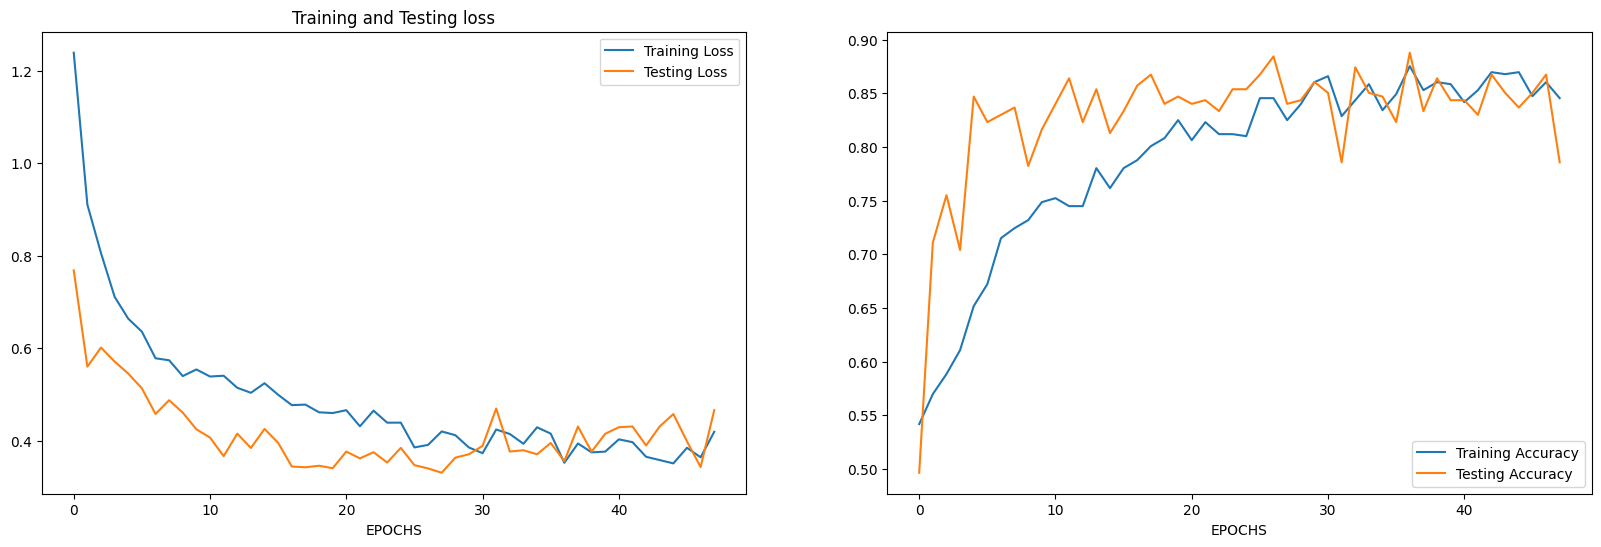

In [42]:
plotting(history_4)

<a id="10"></a>
# **<div style="padding:10px;color:white;display:fill;border-radius:5px;background-color:#5642C5;font-size:120%;font-family:Verdana;"><center><span>Evaluation</span></center></div>**

In [43]:
pred_test = model_3.predict(x_test)
y_pred = encoder.inverse_transform(pred_test)
y_test = encoder.inverse_transform(Y_test)

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step


In [44]:
pred_df = pd.DataFrame(columns=['Predicted Labels' ,'Actual Labels'])
pred_df['Predicted Labels'] = y_pred.flatten()
pred_df['Actual Labels'] = y_test.flatten()
pred_df.head(15)

,Predicted Labels,Actual Labels
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
5,0,0
6,1,1
7,1,1
8,1,1
9,1,1


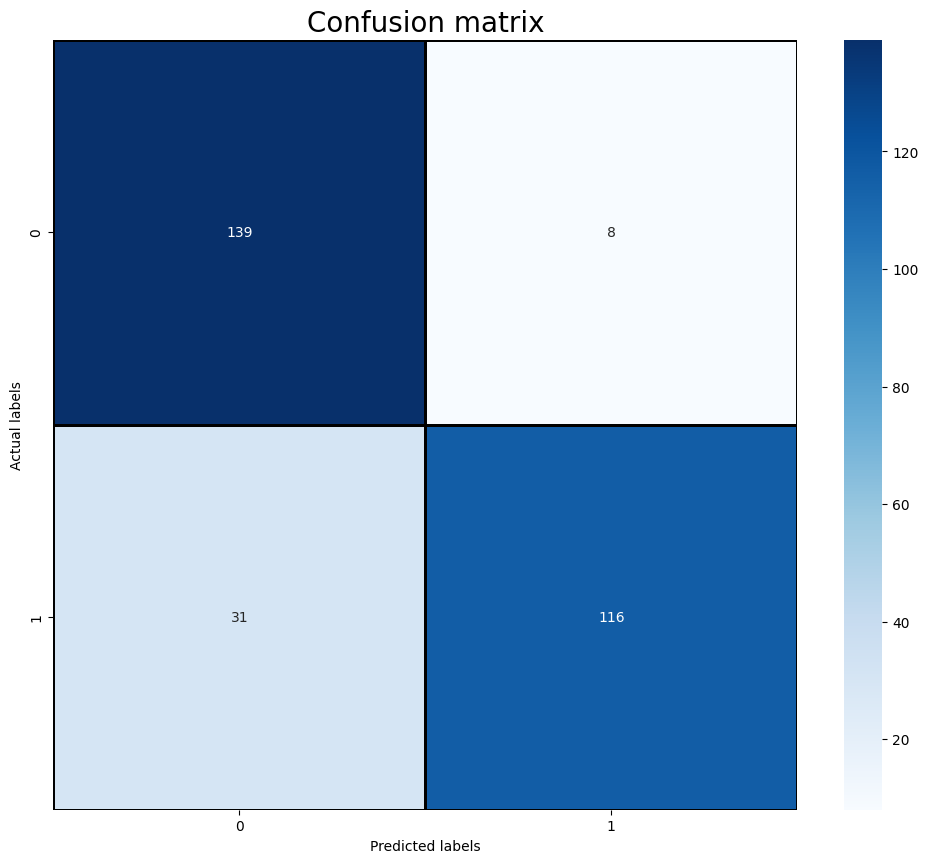

In [45]:
# Predict the values from the test set
cm = confusion_matrix(y_test,y_pred)
plt.figure(figsize=(12,10))
cm = pd.DataFrame(cm , index =[i for i in encoder.categories_] , columns =[i for i in encoder.categories_])
sns.heatmap(cm , linecolor='black', cmap ='Blues' , linewidth=1, annot=True ,fmt='')
plt.title('Confusion matrix' , size = 20)
plt.xlabel('Predicted labels')
plt.ylabel('Actual labels')
plt.show()

Precision: The ratio of correctly predicted positive observations to the total predicted positives. For cats, it is 1.00, meaning every prediction for "cat" was correct.

Recall: The ratio of correctly predicted positive observations to all observations in the actual class. For cats, it is 1.00, indicating all actual cat sounds were correctly identified.

F1-Score: The weighted average of precision and recall. Since both precision and recall are perfect, the F1-score is also 1.00.

Support: The number of actual occurrences of the class in the dataset, with 35 cat samples in this case.

In [46]:
report = classification_report(y_test.flatten(),y_pred.flatten())
print(report)

              precision    recall  f1-score   support

           0       0.82      0.95      0.88       147
           1       0.94      0.79      0.86       147

    accuracy                           0.87       294
   macro avg       0.88      0.87      0.87       294
weighted avg       0.88      0.87      0.87       294

